In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# CrimeCast: Forecasting Crime Categories

Goal:Develop models capable of accurately predicting the crime categories based on this information.

This dataset offers a comprehensive snapshot of criminal activities within the city. It encompasses various aspects of each incident, including date, time, location, victim demographics, and more.

# Data Wrangling

In [2]:
train_df=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')

Columns Description:

Location: Street address of the crime incident.

Cross_Street: Cross street of the rounded address.

Latitude: Latitude coordinates of the crime incident.

Longitude: Longitude coordinates of the crime incident.

Date_Reported: Date the incident was reported.

Date_Occurred: Date the incident occurred.

Time_Occurred: Time the incident occurred in 24-hour military time.

Area_ID: LAPD's Geographic Area number.

Area_Name: Name designation of the LAPD Geographic Area.

Reporting_District_no: Reporting district number.

Part 1-2: Crime classification.

Modus_Operandi: Activities associated with the suspect.

Victim_Age: Age of the victim.

Victim_Sex: Gender of the victim.

Victim_Descent: Descent code of the victim.

Premise_Code: Premise code indicating the location of the crime.

Premise_Description: Description of the premise code.

Weapon_Used_Code: Weapon code indicating the type of weapon used.

Weapon_Description: Description of the weapon code.

Status: Status of the case.

Status_Description: Description of the status code.

Crime_Category: The category of the crime (Target Variable)

In [3]:
train_df['Crime_Category'].shape

(20000,)

In [4]:
test_df=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

In [5]:
pd.set_option('display.max_columns',40)

In [6]:
train_df.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,1.0,0385,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,2.0,0329 1202,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,1.0,0329 1300,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [7]:
test_df.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,2.0,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,1.0,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,2.0,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,1.0,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,2.0,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [8]:
train_df.shape

(20000, 22)

In [9]:
from sklearn.model_selection import train_test_split
import joblib

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [11]:
train_df.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [12]:
train_df['Crime_Category'].value_counts()

Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64

 ****Important Insights From  The Data set****

1. 21 input columns(features) and output column present in the dataset
2. 20000 records are present
3. In the Dataset most no of crimes are property crimes
4. problem is single label single class classification 

In [13]:
train_df.isna().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [14]:
test_df.isna().sum()

Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Premise_Description         1
Weapon_Used_Code         3153
Weapon_Description       3153
Status                      0
Status_Description          0
dtype: int64

In [15]:
def nullpercent(l,data):
    i=0
    for c in l:
        print(" In {} Column Null Values Percentage is {}".format(c,round((data[l[i]].isna().sum()/data.shape[0])*100),2))
        i+=1

In [16]:
columns=list(train_df.columns)
nullpercent(columns,train_df)

 In Location Column Null Values Percentage is 0
 In Cross_Street Column Null Values Percentage is 83
 In Latitude Column Null Values Percentage is 0
 In Longitude Column Null Values Percentage is 0
 In Date_Reported Column Null Values Percentage is 0
 In Date_Occurred Column Null Values Percentage is 0
 In Time_Occurred Column Null Values Percentage is 0
 In Area_ID Column Null Values Percentage is 0
 In Area_Name Column Null Values Percentage is 0
 In Reporting_District_no Column Null Values Percentage is 0
 In Part 1-2 Column Null Values Percentage is 0
 In Modus_Operandi Column Null Values Percentage is 14
 In Victim_Age Column Null Values Percentage is 0
 In Victim_Sex Column Null Values Percentage is 13
 In Victim_Descent Column Null Values Percentage is 13
 In Premise_Code Column Null Values Percentage is 0
 In Premise_Description Column Null Values Percentage is 0
 In Weapon_Used_Code Column Null Values Percentage is 63
 In Weapon_Description Column Null Values Percentage is 63


In [17]:
columns_te=list(test_df.columns)
nullpercent(columns_te,test_df)

 In Location Column Null Values Percentage is 0
 In Cross_Street Column Null Values Percentage is 84
 In Latitude Column Null Values Percentage is 0
 In Longitude Column Null Values Percentage is 0
 In Date_Reported Column Null Values Percentage is 0
 In Date_Occurred Column Null Values Percentage is 0
 In Time_Occurred Column Null Values Percentage is 0
 In Area_ID Column Null Values Percentage is 0
 In Area_Name Column Null Values Percentage is 0
 In Reporting_District_no Column Null Values Percentage is 0
 In Part 1-2 Column Null Values Percentage is 0
 In Modus_Operandi Column Null Values Percentage is 14
 In Victim_Age Column Null Values Percentage is 0
 In Victim_Sex Column Null Values Percentage is 13
 In Victim_Descent Column Null Values Percentage is 13
 In Premise_Code Column Null Values Percentage is 0
 In Premise_Description Column Null Values Percentage is 0
 In Weapon_Used_Code Column Null Values Percentage is 63
 In Weapon_Description Column Null Values Percentage is 63


***Data Imputation using fillna method***

In [18]:
columns1=['Modus_Operandi','Victim_Sex','Cross_Street','Weapon_Description']
for col in columns1:
       train_df[col] = train_df[col].fillna('Unknown')
       test_df[col] = test_df[col].fillna('Unknown')


In [19]:
train_df['Weapon_Used_Code'] = train_df['Weapon_Used_Code'].fillna(train_df['Weapon_Used_Code'].median())
test_df['Weapon_Used_Code'] = test_df['Weapon_Used_Code'].fillna(test_df['Weapon_Used_Code'].median())

***Data Imputation using Simple Imputer method***

In [20]:
'''from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
columns1=['Modus_Operandi','Victim_Sex','Victim_Descent','Premise_Description','Cross_Street','Weapon_Description']
for col in columns1:
         train_df[col]=si.fit_transform(train_df[col].values.reshape(-1,1)).ravel()
         test_df[col]=si.fit_transform(test_df[col].values.reshape(-1,1)).ravel()'''



"from sklearn.impute import SimpleImputer\nsi=SimpleImputer(strategy='most_frequent')\ncolumns1=['Modus_Operandi','Victim_Sex','Victim_Descent','Premise_Description','Cross_Street','Weapon_Description']\nfor col in columns1:\n         train_df[col]=si.fit_transform(train_df[col].values.reshape(-1,1)).ravel()\n         test_df[col]=si.fit_transform(test_df[col].values.reshape(-1,1)).ravel()"

In [21]:
train_df['Crime_Category'].shape

(20000,)

In [22]:
train_df.isna().sum()
test_df.isna().sum()

Location                   0
Cross_Street               0
Latitude                   0
Longitude                  0
Date_Reported              0
Date_Occurred              0
Time_Occurred              0
Area_ID                    0
Area_Name                  0
Reporting_District_no      0
Part 1-2                   0
Modus_Operandi             0
Victim_Age                 0
Victim_Sex                 0
Victim_Descent           643
Premise_Code               0
Premise_Description        1
Weapon_Used_Code           0
Weapon_Description         0
Status                     0
Status_Description         0
dtype: int64

****Dropping Duplicates****

In [23]:
train_df.duplicated().sum()
test_df.duplicated().sum()

3

In [24]:
train_df['Crime_Category'].shape

(20000,)

In [25]:
#train_df.drop_duplicates(inplace=True)
#test_df.drop_duplicates(inplace=True)

In [26]:
train_df.duplicated().sum()
test_df.duplicated().sum()

3

In [27]:
train_df.isna().sum()

Location                    0
Cross_Street                0
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi              0
Victim_Age                  0
Victim_Sex                  0
Victim_Descent           2624
Premise_Code                0
Premise_Description         5
Weapon_Used_Code            0
Weapon_Description          0
Status                      0
Status_Description          0
Crime_Category              0
dtype: int64

****Correcting Datatype****

In [28]:
train_df['Location'].nunique()

12399

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           20000 non-null  object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         20000 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             20000 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [30]:
def timetransform_hours(x):
  return int(x//100)


def timetransform_minutes(x):
  return int(x%100)

In [31]:
train_df['Time_hours']=train_df['Time_Occurred'].apply(timetransform_hours)
train_df['Time_minutes']=train_df['Time_Occurred'].apply(timetransform_minutes)
test_df['Time_hours']=test_df['Time_Occurred'].apply(timetransform_hours)
test_df['Time_minutes']=test_df['Time_Occurred'].apply(timetransform_minutes)


In [32]:
columns2=['Date_Reported','Date_Occurred']
for col in columns2:
              train_df[col]=train_df[col].apply(lambda x:x.split(' ')[0])
              test_df[col]=test_df[col].apply(lambda x:x.split(' ')[0])



In [33]:
columns2=['Date_Reported','Date_Occurred']
for col in columns2:
              train_df[col]=pd.to_datetime(train_df[col])
              test_df[col]=pd.to_datetime(train_df[col])


In [34]:
def date(x):
  return int(x.day)

def year(x):
  return int(x.year)

def month(x):
  return int(x.month)

In [35]:
train_df['Day_Occurred']=train_df['Date_Occurred'].apply(date)
train_df['Month_Occurred']=train_df['Date_Occurred'].apply(month)
train_df['Year_Occurred']=train_df['Date_Occurred'].apply(year)
train_df['Day_Reported']=train_df['Date_Reported'].apply(date)
train_df['Month_Reported']=train_df['Date_Reported'].apply(month)
train_df['Year_Reported']=train_df['Date_Reported'].apply(year)


In [36]:
test_df['Day_Occurred']=test_df['Date_Occurred'].apply(date)
test_df['Month_Occurred']=test_df['Date_Occurred'].apply(month)
test_df['Year_Occurred']=test_df['Date_Occurred'].apply(year)
test_df['Day_Reported']=test_df['Date_Reported'].apply(date)
test_df['Month_Reported']=test_df['Date_Reported'].apply(month)
test_df['Year_Reported']=test_df['Date_Reported'].apply(year)


In [37]:
train_df.drop(columns=['Time_Occurred','Date_Occurred','Date_Reported','Cross_Street'],inplace=True)
test_df.drop(columns=['Time_Occurred','Date_Occurred','Date_Reported','Cross_Street'],inplace=True)


In [38]:
train_df['Area_ID']=train_df['Area_ID'].astype('int32')
train_df['Reporting_District_no']=train_df['Reporting_District_no'].astype('int32')
train_df['Part 1-2']=train_df['Part 1-2'].astype('int32')
train_df['Victim_Age']=train_df['Victim_Age'].astype('int32')
train_df['Premise_Code']=train_df['Premise_Code'].astype('int32')
train_df['Modus_Operandi']=train_df['Modus_Operandi'].astype('str')

In [39]:
test_df['Area_ID']=test_df['Area_ID'].astype('int32')
test_df['Reporting_District_no']=test_df['Reporting_District_no'].astype('int32')
test_df['Part 1-2']=test_df['Part 1-2'].astype('int32')
test_df['Victim_Age']=test_df['Victim_Age'].astype('int32')
test_df['Premise_Code']=test_df['Premise_Code'].astype('int32')
test_df['Modus_Operandi']=test_df['Modus_Operandi'].astype('str')

In [40]:
train_df['Area_Name'].nunique()

21

In [41]:
train_df['Victim_Age'] = train_df['Victim_Age'].apply(lambda x : 0 if x <= 0 else x)
train_df['Victim_Sex']=train_df['Victim_Sex'].apply(lambda x:x if x=='M' or x=='F' else 'others')
test_df['Victim_Sex']=test_df['Victim_Sex'].apply(lambda x:x if x=='M' or x=='F' else 'others')

In [42]:
train_df['Victim_Sex']=train_df['Victim_Sex'].astype('category')
test_df['Victim_Sex']=test_df['Victim_Sex'].astype('category')
#train_df['Victim_Descent']=train_df['Victim_Descent'].astype('category')
#test_df['Victim_Descent']=test_df['Victim_Descent'].astype('category')

In [43]:
#counts=train_df['Victim_Descent'].value_counts()
#ind=counts[counts<1000].index
#train_df['Victim_Descent']=train_df['Victim_Descent'].replace(ind,'others')


In [44]:
train_df['Victim_Sex']=train_df['Victim_Sex'].apply(lambda x:x if x=='M' or x=='F' else 'others')
test_df['Victim_Sex']=test_df['Victim_Sex'].apply(lambda x:x if x=='M' or x=='F' else 'others')

In [45]:
train_df.drop(columns=['Location','Area_Name','Status','Status_Description','Victim_Descent','Premise_Description'],inplace=True)
test_df.drop(columns=['Location','Area_Name','Status','Status_Description','Victim_Descent','Premise_Description'],inplace=True)

In [46]:
train_df['Crime_Category']=train_df['Crime_Category'].astype('category')

# EDA(Exploratory Data Analysis)

UNIVARIATE ANALYSIS

In [47]:
import matplotlib as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Victim_Sex', ylabel='count'>

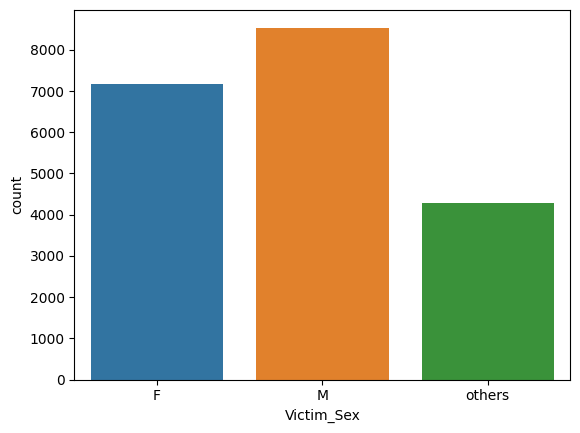

In [48]:
sns.countplot(data=train_df,x='Victim_Sex')

<Axes: xlabel='Crime_Category', ylabel='count'>

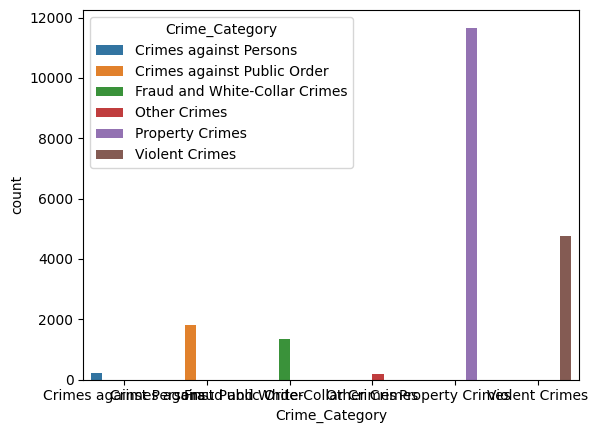

In [49]:
sns.countplot(data=train_df,x='Crime_Category',hue='Crime_Category')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

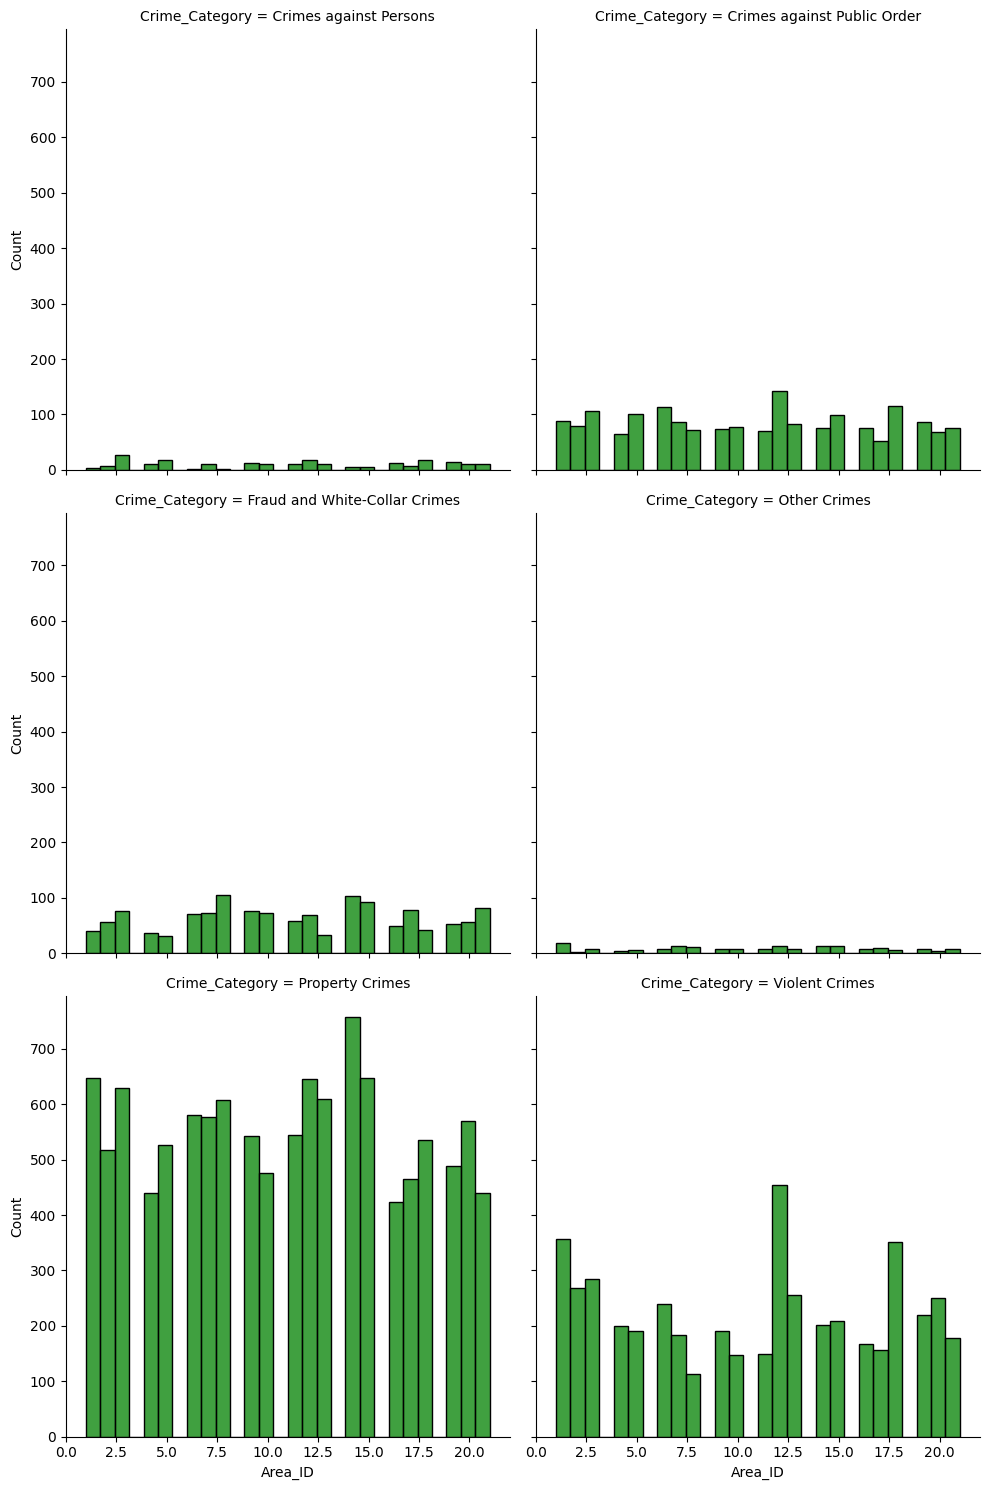

In [50]:
sns.displot(data=train_df,x='Area_ID',col='Crime_Category',kind='hist',color='green',col_wrap=2)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

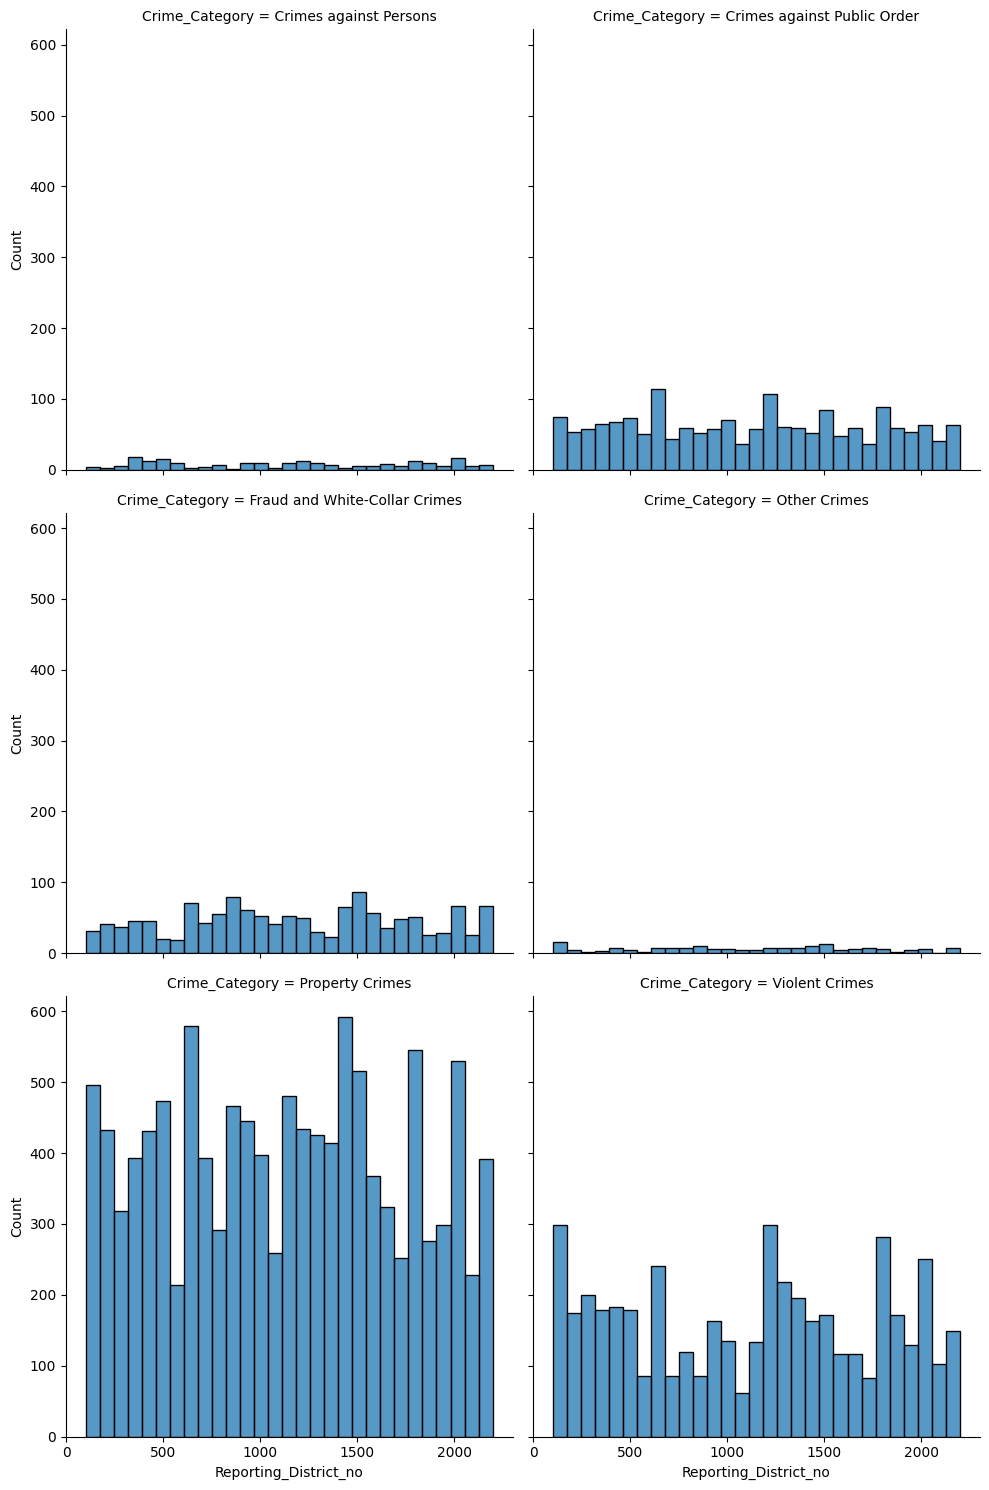

In [51]:
sns.displot(data=train_df,col='Crime_Category',x='Reporting_District_no',kind='hist',col_wrap=2)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping

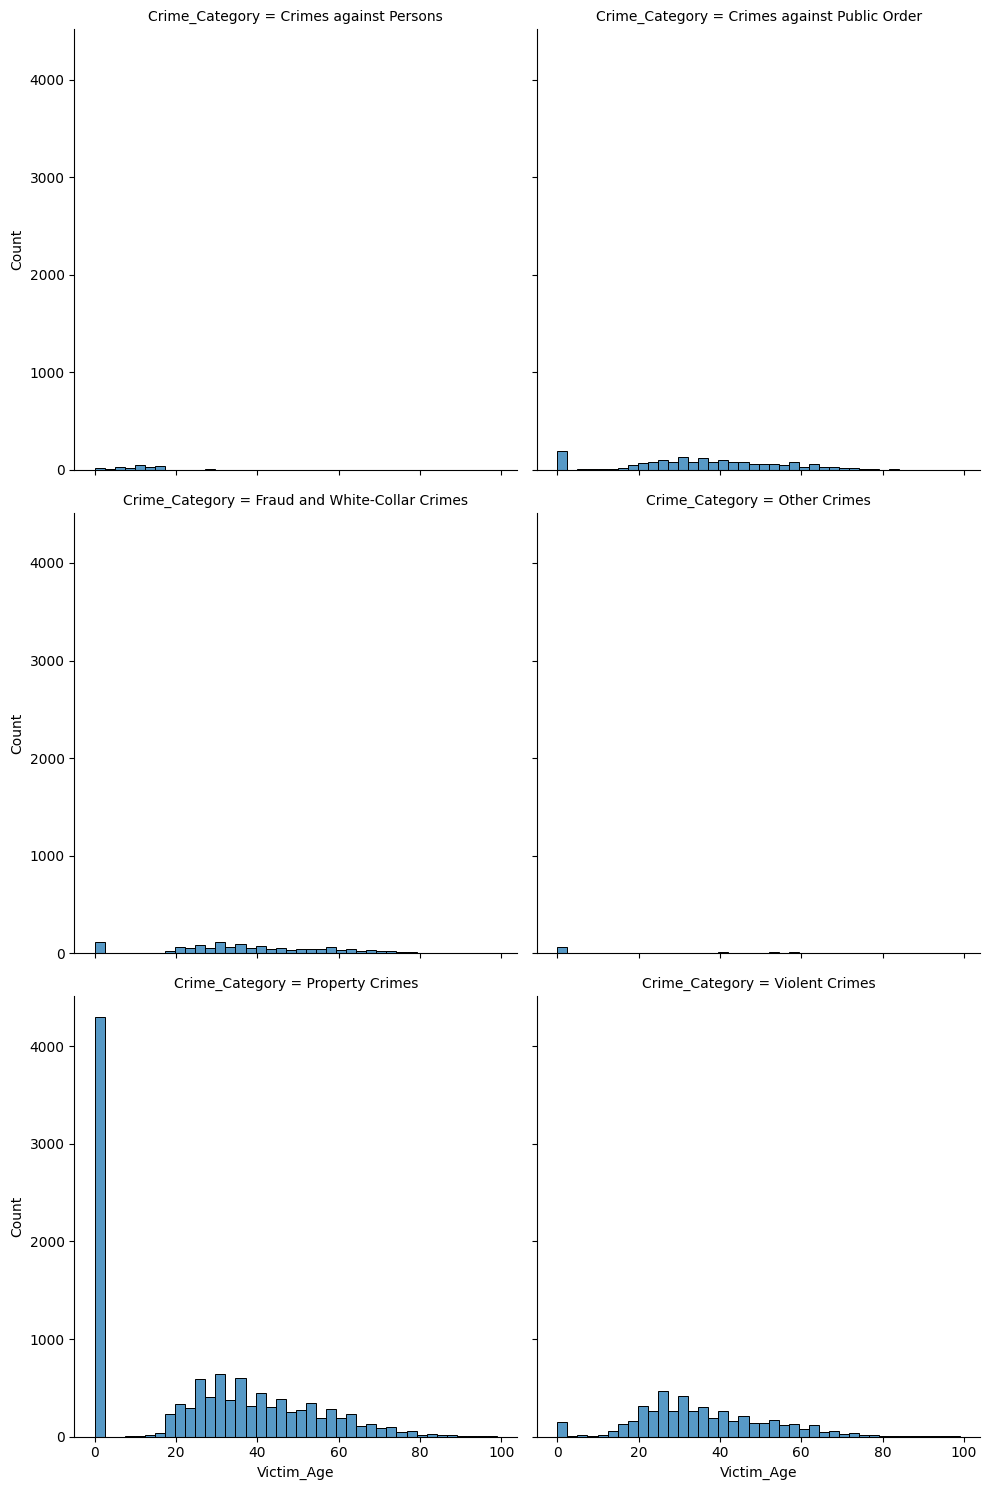

In [52]:
sns.displot(data=train_df,x='Victim_Age',kind='hist',col='Crime_Category',col_wrap=2)

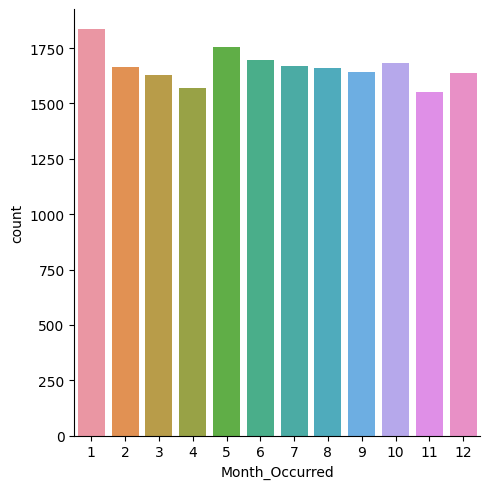

In [53]:
sns.catplot(data=train_df,x='Month_Occurred',kind='count')

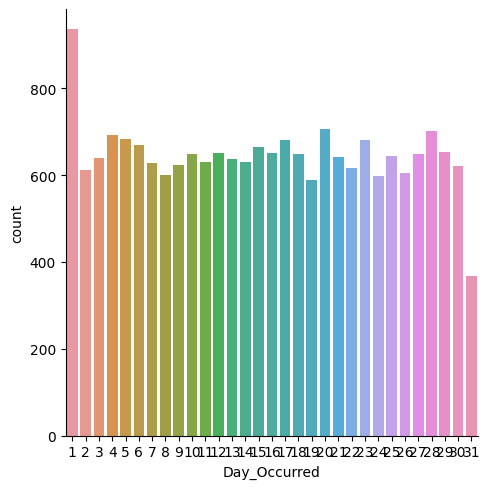

In [54]:
sns.catplot(data=train_df,x='Day_Occurred',kind='count')

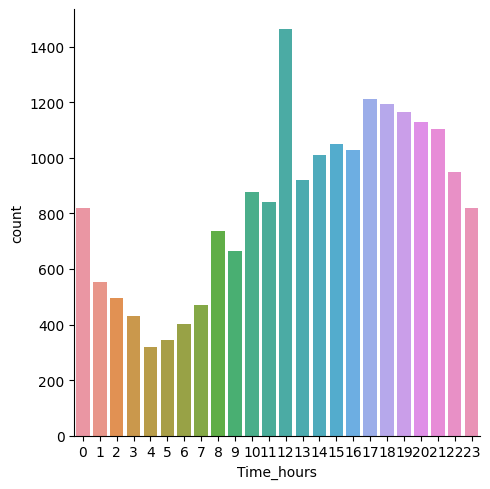

In [55]:
sns.catplot(data=train_df,x='Time_hours',kind='count')

1.Most of the Victims are Male

2.Most of the Victims are of Descent Code 'H'

3.Most of the Crimes are Property Crimes

4.Crimes against persons are less Ocurred

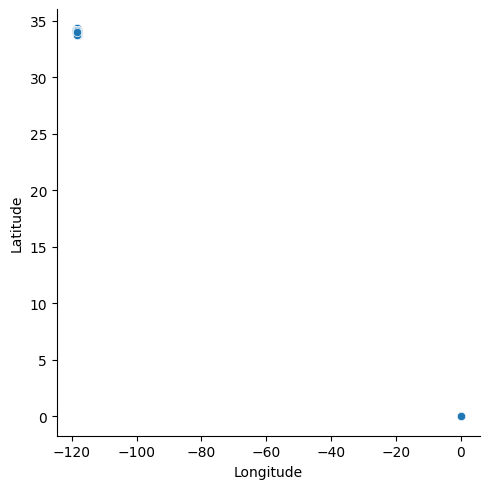

In [56]:
sns.relplot(data=train_df,x='Longitude',y='Latitude',kind='scatter')

# Observations

1.Most of the Victims are Male 

2.Most of the Crimes are 'Property Crimes' followed by 'Crimes against Persons'

3.Most of the Crimes are Occured in January Month

4.Less Crimes are Happened in April Month

5.More Crimes occured in the First day of every Month

6.More Crimes occured at 12PM

7.Less Crimes are at 4:00AM

8.Crime Rate Decreased After Evening  6PM

9.Crimes are relatively evenly distributed across the days of the month.



# Data Preprocessing

****converting categorical columns into numerical columns****

In [57]:
'''from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False,drop='first',dtype=np.int32)'''

"from sklearn.preprocessing import OneHotEncoder\nohe=OneHotEncoder(sparse=False,drop='first',dtype=np.int32)"

In [58]:
'''encoded_data_train=ohe.fit_transform(train_df['Victim_Sex'].values.reshape(-1,1))
encoded_data_test=ohe.fit_transform(test_df['Victim_Sex'].values.reshape(-1,1))'''

"encoded_data_train=ohe.fit_transform(train_df['Victim_Sex'].values.reshape(-1,1))\nencoded_data_test=ohe.fit_transform(test_df['Victim_Sex'].values.reshape(-1,1))"

In [59]:
#ohe.get_feature_names_out()

In [60]:
'''train_df['Victim_M']=encoded_data_train[:,0]
train_df['Victim_Oth']=encoded_data_train[:,1]

test_df['Victim_M']=encoded_data_test[:,0]
test_df['Victim_Oth']=encoded_data_test[:,1]'''

"train_df['Victim_M']=encoded_data_train[:,0]\ntrain_df['Victim_Oth']=encoded_data_train[:,1]\n\ntest_df['Victim_M']=encoded_data_test[:,0]\ntest_df['Victim_Oth']=encoded_data_test[:,1]"

In [61]:
'''train_df.drop(columns=['Victim_Sex'],inplace=True)
test_df.drop(columns=['Victim_Sex'],inplace=True)'''

"train_df.drop(columns=['Victim_Sex'],inplace=True)\ntest_df.drop(columns=['Victim_Sex'],inplace=True)"

In [62]:
train_df.tail()

,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Premise_Code,Weapon_Used_Code,Weapon_Description,Crime_Category,Time_hours,Time_minutes,Day_Occurred,Month_Occurred,Year_Occurred,Day_Reported,Month_Reported,Year_Reported
19995,34.0334,-118.3523,3,303,2,0416 0446 2004 0913,51,M,501,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Violent Crimes,7,0,24,5,2020,24,5,2020
19996,34.2212,-118.5011,10,1008,1,1822 0209 0344 1414 1420,0,M,301,400.0,Unknown,Property Crimes,2,59,25,12,2020,25,12,2020
19997,34.0571,-118.3815,8,849,1,0344 1822 1420,42,M,102,400.0,Unknown,Property Crimes,14,0,25,9,2020,25,9,2020
19998,33.7451,-118.2835,5,558,2,1202 2038 0913 0602 1242 0553,76,F,501,400.0,Unknown,Crimes against Public Order,6,0,10,6,2020,10,6,2020
19999,34.0037,-118.3034,3,397,1,Unknown,0,others,101,400.0,Unknown,Property Crimes,18,0,17,2,2020,18,2,2020


In [63]:
from sklearn.preprocessing import OrdinalEncoder
le=OrdinalEncoder()
train_df['Victim_Sex']=le.fit_transform(train_df['Victim_Sex'].values.reshape(-1,1)).ravel()
test_df['Victim_Sex']=le.fit_transform(test_df['Victim_Sex'].values.reshape(-1,1)).ravel()

In [64]:
#train_df['Cross_Street']=le.fit_transform(train_df['Cross_Street'].values.reshape(-1,1)).ravel()
#test_df['Cross_Street']=le.fit_transform(test_df['Cross_Street'].values.reshape(-1,1)).ravel()
train_df['Weapon_Description']=le.fit_transform(train_df['Weapon_Description'].values.reshape(-1,1)).ravel()
test_df['Weapon_Description']=le.fit_transform(test_df['Weapon_Description'].values.reshape(-1,1)).ravel()
#train_df['Status']=le.fit_transform(train_df['Status'].values.reshape(-1,1)).ravel()
#test_df['Status']=le.fit_transform(test_df['Status'].values.reshape(-1,1)).ravel()


In [65]:
#train_df['Area_Name']=le.fit_transform(train_df['Area_Name'].values.reshape(-1,1)).ravel()
#test_df['Area_Name']=le.fit_transform(test_df['Area_Name'].values.reshape(-1,1)).ravel()


In [66]:
train_df.tail()

,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Premise_Code,Weapon_Used_Code,Weapon_Description,Crime_Category,Time_hours,Time_minutes,Day_Occurred,Month_Occurred,Year_Occurred,Day_Reported,Month_Reported,Year_Reported
19995,34.0334,-118.3523,3,303,2,0416 0446 2004 0913,51,1.0,501,400.0,47.0,Violent Crimes,7,0,24,5,2020,24,5,2020
19996,34.2212,-118.5011,10,1008,1,1822 0209 0344 1414 1420,0,1.0,301,400.0,55.0,Property Crimes,2,59,25,12,2020,25,12,2020
19997,34.0571,-118.3815,8,849,1,0344 1822 1420,42,1.0,102,400.0,55.0,Property Crimes,14,0,25,9,2020,25,9,2020
19998,33.7451,-118.2835,5,558,2,1202 2038 0913 0602 1242 0553,76,0.0,501,400.0,55.0,Crimes against Public Order,6,0,10,6,2020,10,6,2020
19999,34.0037,-118.3034,3,397,1,Unknown,0,2.0,101,400.0,55.0,Property Crimes,18,0,17,2,2020,18,2,2020


In [67]:
train_df.isna().sum()

Latitude                 0
Longitude                0
Area_ID                  0
Reporting_District_no    0
Part 1-2                 0
Modus_Operandi           0
Victim_Age               0
Victim_Sex               0
Premise_Code             0
Weapon_Used_Code         0
Weapon_Description       0
Crime_Category           0
Time_hours               0
Time_minutes             0
Day_Occurred             0
Month_Occurred           0
Year_Occurred            0
Day_Reported             0
Month_Reported           0
Year_Reported            0
dtype: int64

In [68]:
'''counts_train=train_df['Victim_Descent'].value_counts()
index_train=counts_train[counts_train<1000].index


counts_test=test_df['Victim_Descent'].value_counts()
index_test=counts_test[counts_test<1000].index
index_test'''

"counts_train=train_df['Victim_Descent'].value_counts()\nindex_train=counts_train[counts_train<1000].index\n\n\ncounts_test=test_df['Victim_Descent'].value_counts()\nindex_test=counts_test[counts_test<1000].index\nindex_test"

In [69]:
#train_df['Victim_Descent'].nunique()

In [70]:
'''train_df['Victim_Descent']=train_df['Victim_Descent'].replace(index_train,'Others')
test_df['Victim_Descent']=test_df['Victim_Descent'].replace(index_test,'Others')'''

"train_df['Victim_Descent']=train_df['Victim_Descent'].replace(index_train,'Others')\ntest_df['Victim_Descent']=test_df['Victim_Descent'].replace(index_test,'Others')"

In [71]:
#test_df['Victim_Descent'].value_counts()

In [72]:
'''encoded_data2_train=ohe.fit_transform(train_df['Victim_Descent'].values.reshape(-1,1))
encoded_data2_test=ohe.fit_transform(test_df['Victim_Descent'].values.reshape(-1,1))'''

"encoded_data2_train=ohe.fit_transform(train_df['Victim_Descent'].values.reshape(-1,1))\nencoded_data2_test=ohe.fit_transform(test_df['Victim_Descent'].values.reshape(-1,1))"

In [73]:
from sklearn.preprocessing import OrdinalEncoder
le=OrdinalEncoder()

In [74]:
'''train_df['Descent_H']=encoded_data2_train[:,0]
train_df['Descent_O']=encoded_data2_train[:,1]
train_df['Descent_Oth']=encoded_data2_train[:,2]
train_df['Descent_W']=encoded_data2_train[:,3]
train_df['Descent_X']=encoded_data2_train[:,4]


test_df['Descent_Oth']=encoded_data2_test[:,0]
test_df['Descent_W']=encoded_data2_test[:,1]'''


"train_df['Descent_H']=encoded_data2_train[:,0]\ntrain_df['Descent_O']=encoded_data2_train[:,1]\ntrain_df['Descent_Oth']=encoded_data2_train[:,2]\ntrain_df['Descent_W']=encoded_data2_train[:,3]\ntrain_df['Descent_X']=encoded_data2_train[:,4]\n\n\ntest_df['Descent_Oth']=encoded_data2_test[:,0]\ntest_df['Descent_W']=encoded_data2_test[:,1]"

In [75]:
#train_df['Victim_Descent_n']=le.fit_transform(train_df['Victim_Descent'].values.reshape(-1,1)).ravel()
#test_df['Victim_Descent_n']=le.fit_transform(test_df['Victim_Descent'].values.reshape(-1,1)).ravel()

In [76]:
#train_df.drop(columns=['Victim_Descent','Premise_Description'],inplace=True)
#test_df.drop(columns=['Victim_Descent','Premise_Description'],inplace=True)


In [77]:
from sklearn.preprocessing import LabelEncoder
le_label_encoder=LabelEncoder()

In [78]:
train_df['Crime_Category']=le_label_encoder.fit_transform(train_df['Crime_Category'])

In [79]:
joblib.dump(le_label_encoder, 'le_label_encoder.pkl')

['le_label_encoder.pkl']

In [80]:
'''counts_m_tr=train_df['Modus_Operandi'].value_counts()
n=counts_m_tr[counts_m_tr<100].index
train_df['Modus_Operandi']=train_df['Modus_Operandi'].replace(n,'Others')'''

"counts_m_tr=train_df['Modus_Operandi'].value_counts()\nn=counts_m_tr[counts_m_tr<100].index\ntrain_df['Modus_Operandi']=train_df['Modus_Operandi'].replace(n,'Others')"

In [81]:
''''counts_m_te=test_df['Modus_Operandi'].value_counts()
n_te=counts_m_te[counts_m_te<100].index
test_df['Modus_Operandi']=test_df['Modus_Operandi'].replace(n_te,'Others')'''

"'counts_m_te=test_df['Modus_Operandi'].value_counts()\nn_te=counts_m_te[counts_m_te<100].index\ntest_df['Modus_Operandi']=test_df['Modus_Operandi'].replace(n_te,'Others')"

In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [83]:
#train_df['Modus_Operandi_n']=le.fit_transform(train_df['Modus_Operandi'].values.reshape(-1,1)).ravel()
#test_df['Modus_Operandi_n']=le.fit_transform(test_df['Modus_Operandi'].values.reshape(-1,1)).ravel()


 ****Working with Modus operandi column****

In [84]:
ml=[]
for x in train_df['Modus_Operandi'].unique():
         s=str(x).split(' ')
         for n in s:
                ml.append(n)
                    
nl=list(set(ml))
datam=np.zeros(shape=(train_df.shape[0],len(nl)))
condata=pd.DataFrame(datam,columns=nl,dtype='int8')
train_df=pd.concat([train_df,condata],axis=1)

for x in train_df['Modus_Operandi'].unique():
                 ind = train_df.index[train_df['Modus_Operandi'] == x]  
                 s=str(x).split(' ')
                 for n in s:
                        train_df.loc[ind,n]=1    
    

      

In [85]:
ml_te=[]
for x in test_df['Modus_Operandi'].unique():
         s=str(x).split(' ')
         for n in s:
                ml_te.append(n)
                    
nl=list(set(ml_te))
datam=np.zeros(shape=(test_df.shape[0],len(nl)))
condata=pd.DataFrame(datam,columns=nl,dtype='int8')
test_df=pd.concat([test_df,condata],axis=1)

for x in test_df['Modus_Operandi'].unique():
                 ind = test_df.index[test_df['Modus_Operandi'] == x]  
                 s=str(x).split(' ')
                 for n in s:
                        test_df.loc[ind,n]=1

In [86]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#cv=TfidfVectorizer()
'''from sklearn.preprocessing import MultiLabelBinarizer
cv=MultiLabelBinarizer()
motr=train_df[['Modus_Operandi']]
motest=test_df[['Modus_Operandi']]
mo=cv.fit_transform(motr['Modus_Operandi'])
modus_df=pd.DataFrame(mo)
mo_te=cv.fit_transform(motest['Modus_Operandi'])
modus_dfte=pd.DataFrame(mo_te)'''


"from sklearn.preprocessing import MultiLabelBinarizer\ncv=MultiLabelBinarizer()\nmotr=train_df[['Modus_Operandi']]\nmotest=test_df[['Modus_Operandi']]\nmo=cv.fit_transform(motr['Modus_Operandi'])\nmodus_df=pd.DataFrame(mo)\nmo_te=cv.fit_transform(motest['Modus_Operandi'])\nmodus_dfte=pd.DataFrame(mo_te)"

In [87]:
#train_df=pd.concat([train_df,modus_df],axis=1)
#test_df=pd.concat([test_df,modus_dfte],axis=1)

In [88]:
train_df.drop(columns=['Modus_Operandi'],inplace=True)
test_df.drop(columns=['Modus_Operandi'],inplace=True)

In [89]:
train_df.head()

,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Premise_Code,Weapon_Used_Code,Weapon_Description,Crime_Category,Time_hours,Time_minutes,Day_Occurred,Month_Occurred,Year_Occurred,Day_Reported,Month_Reported,Year_Reported,1229,...,3003,1602,2108,1607,2047,1522,0410,0121,0902,0419,1238,1414,0604,0304,0538,0944,0853,0402,1303,2104
0,34.1522,-118.3910,15,1563,1,75,1.0,101,400.0,55.0,4,18,0,6,3,2020,9,3,2020,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,34.0028,-118.2391,13,1367,1,41,1.0,216,400.0,47.0,4,13,45,27,2,2020,27,2,2020,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,34.0111,-118.2653,13,1343,2,67,1.0,501,400.0,55.0,4,6,5,21,8,2020,21,8,2020,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,34.2953,-118.4590,19,1924,1,61,1.0,101,400.0,55.0,4,18,0,6,11,2020,8,11,2020,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,33.9787,-118.2918,12,1245,1,0,2.0,401,400.0,47.0,4,11,30,25,2,2020,25,2,2020,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

****Outlier Removal****

In [91]:
q1=train_df['Victim_Age'].quantile(0.25)
q3=train_df['Victim_Age'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
train_df['Victim_Age']=np.where(train_df['Victim_Age']>upper_limit,upper_limit,np.where(train_df['Victim_Age']<lower_limit,lower_limit,train_df['Victim_Age']))


In [92]:
q1=test_df['Victim_Age'].quantile(0.25)
q3=test_df['Victim_Age'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
test_df['Victim_Age']=np.where(test_df['Victim_Age']>upper_limit,upper_limit,np.where(test_df['Victim_Age']<lower_limit,lower_limit,test_df['Victim_Age']))


In [93]:
train_df.isna().sum()

Latitude                 0
Longitude                0
Area_ID                  0
Reporting_District_no    0
Part 1-2                 0
Victim_Age               0
Victim_Sex               0
Premise_Code             0
Weapon_Used_Code         0
Weapon_Description       0
Crime_Category           0
Time_hours               0
Time_minutes             0
Day_Occurred             0
Month_Occurred           0
Year_Occurred            0
Day_Reported             0
Month_Reported           0
Year_Reported            0
1229                     0
1022                     0
0550                     0
1913                     0
1824                     0
2020                     0
2042                     0
2051                     0
1204                     0
1026                     0
0414                     0
1275                     0
0528                     0
1311                     0
0322                     0
0105                     0
0907                     0
1218                     0
0

In [94]:
X=train_df.drop(columns=['Crime_Category'])
Y=train_df[['Crime_Category']]

****Polynomial Features****

In [95]:
'''from sklearn.preprocessing import PolynomialFeatures
pe=PolynomialFeatures(degree=2)
poly=pe.fit_transform(X)
X_p=pd.DataFrame(poly,columns=pe.get_feature_names_out())'''

'from sklearn.preprocessing import PolynomialFeatures\npe=PolynomialFeatures(degree=2)\npoly=pe.fit_transform(X)\nX_p=pd.DataFrame(poly,columns=pe.get_feature_names_out())'

In [96]:
'''poly_te=pe.fit_transform(test_df)
X_pte=pd.DataFrame(poly_te,columns=pe.get_feature_names_out())'''

'poly_te=pe.fit_transform(test_df)\nX_pte=pd.DataFrame(poly_te,columns=pe.get_feature_names_out())'

In [97]:
#X_p.shape

****PCA****

In [98]:
X.columns=X.columns.astype(str)
test_df.columns=test_df.columns.astype(str)

In [99]:
from sklearn.decomposition import PCA
pca=PCA(n_components=125)
pcaarray=pca.fit_transform(X)
X_pp=pd.DataFrame(pcaarray,columns=pca.get_feature_names_out())

In [100]:
pcaarray_te=pca.fit_transform(test_df)
X_ppte=pd.DataFrame(pcaarray_te,columns=pca.get_feature_names_out())

****Feature Scaling****

In [101]:
X_pp.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60,pca61,pca62,pca63,pca64,pca65,pca66,pca67,pca68,pca69,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,pca79,pca80,pca81,pca82,pca83,pca84,pca85,pca86,pca87,pca88,pca89,pca90,pca91,pca92,pca93,pca94,pca95,pca96,pca97,pca98,pca99,pca100,pca101,pca102,pca103,pca104,pca105,pca106,pca107,pca108,pca109,pca110,pca111,pca112,pca113,pca114,pca115,pca116,pca117,pca118,pca119,pca120,pca121,pca122,pca123,pca124
0,433.121757,-195.287585,-21.335887,47.118357,-20.296997,-10.949714,-0.225942,-3.297081,-4.768387,4.632068,-1.528834,-0.033552,-0.707187,-0.612112,-0.356668,-0.080753,0.214947,-0.181623,0.066173,0.023774,-0.001801,0.038303,0.146449,0.118635,0.021633,0.059609,0.223875,0.025286,0.280860,-0.310517,-0.109045,-0.145567,-0.002813,0.085021,0.087866,-0.025935,-0.070508,-0.069609,0.084940,-0.001752,0.150948,-0.247270,-0.091764,-0.228316,0.122778,-0.156677,-0.003629,-0.256512,-0.110317,0.156708,-0.123159,-0.024971,-0.097178,0.370590,0.434972,-0.214221,-0.215381,0.225398,-0.240954,0.069654,0.172617,-0.161376,0.005681,0.131579,-0.026255,-0.026703,0.049637,0.020461,0.041456,0.007134,-0.015089,-0.019852,0.044053,0.022320,0.047672,-0.002291,-0.005646,-0.006654,-0.026376,0.000836,-0.038153,0.005455,-0.001073,-0.030980,0.010095,0.028894,0.001616,-0.000458,0.017080,-0.005885,0.012920,-0.003911,-0.005891,0.009071,-0.012431,0.015213,-0.002333,-0.004945,-0.015099,-0.003525,0.013098,0.009318,-0.002660,-0.014359,0.003014,0.034909,-0.002254,0.017746,-0.010537,0.001597,-0.010994,-0.001730,-0.016588,0.002904,-0.003527,0.004166,-0.003319,0.001711,0.002317,-0.005696,-0.001430,-0.008114,0.013887,-0.002867,0.003772
1,237.273388,-80.699179,-15.104648,14.482292,27.578575,15.850087,-0.852829,3.227673,0.914661,6.215431,0.046639,-0.041049,-0.742668,0.601253,0.230160,-0.730735,-0.611848,0.163349,-0.517854,-0.186772,0.409772,-0.024012,0.311702,-0.135661,-0.254343,0.125312,-0.082229,-0.015981,-0.075264,-0.081449,-0.171830,0.031161,-0.143617,0.552170,-0.248999,0.182051,0.241773,0.129141,-0.103877,-0.309073,0.671621,0.279557,0.392124,0.372422,-0.142491,-0.055382,0.158762,0.888494,-0.176095,0.322728,0.103799,-0.418237,-0.014904,0.271631,-0.064089,-0.079049,-0.075576,0.153812,-0.041350,0.859850,0.220338,0.211480,0.202595,-0.032190,-0.004069,0.002726,-0.109887,0.004710,-0.007046,-0.173488,0.036653,-0.006858,-0.057770,0.002404,-0.025353,-0.060895,-0.043672,-0.039936,-0.036057,0.028257,-0.036956,0.038790,-0.075509,0.081397,0.040447,-0.080807,-0.024332,-0.018400,-0.049998,-0.004900,0.018498,0.047350,-0.005483,0.008699,0.036311,-0.016623,-0.036202,0.047185,0.004897,-0.017021,-0.080110,-0.023580,-0.001877,-0.006574,0.064359,-0.050793,0.002217,-0.024343,-0.048869,0.065755,0.101317,0.097317,0.043464,0.039978,-0.115694,-0.060357,0.034364,0.213630,-0.091573,-0.180366,-0.252805,-0.134458,0.379701,-0.030800,0.064021
2,213.760815,204.502870,-4.402579,31.440078,-14.777928,7.775199,-0.093906,-5.029370,6.724085,-2.554454,0.524494,-0.088142,-0.420129,-1.116434,0.247702,0.669860,-0.111728,-0.140130,-0.024167,-0.208319,0.218907,0.132291,0.011495,-0.070223,0.064654,0.028380,0.058238,0.053360,-0.420685,0.035898,0.574720,0.311184,0.015579,0.070107,0.001196,0.001217,-0.056975,0.018790,0.030188,0.004707,0.036199,-0.021738,0.029475,-0.008646,0.027201,-0.036307,-0.010744,-0.028201,-0.012004,0.012482,0.004237,0.016140,0.006592,0.031425,-0.015712,-0.025041,0.020072,-0.034232,0.011449,-0.009524,-0.008938,0.005518,-0.015481,-0.014605,-0.003154,0.018869,0.016718,-0.006045,-0.015474,-0.011086,0.013845,0.004862,0.002218,-0.006158,-0.003128,-0.005080,0.014030,0.004808,-0.029393,-0.000374,0.000751,-0.031804,-0.001218,0.011987,0.007951,-0.045639,0.0287

In [102]:
#columns=['Latitude', 'Longitude', 'Victim_Age', 'Time_hours', 'Time_minutes','Reporting_District_no','Weapon_Used_Code']                                                                                                            

In [103]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()



In [104]:
X_sc=sc.fit_transform(X_pp)
x_tr=pd.DataFrame(X_sc,columns=X_pp.columns)

In [105]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 387 entries, Latitude to 0853
dtypes: float64(6), int32(4), int64(8), int8(369)
memory usage: 2.4 MB


In [106]:
X_tesc=sc.fit_transform(X_ppte)
x_te=pd.DataFrame(X_tesc,columns=X_ppte.columns)

In [107]:
x_train, x_val, y_train, y_val = train_test_split(
    x_tr,Y, test_size=0.3, random_state=42)

In [108]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14000 entries, 17218 to 15795
Columns: 125 entries, pca0 to pca124
dtypes: float64(125)
memory usage: 13.5 MB


<Axes: >

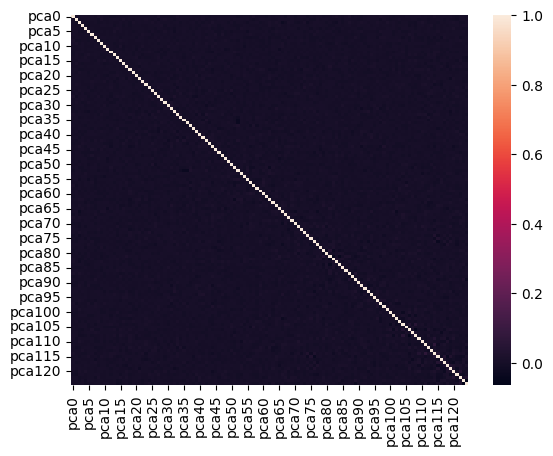

In [109]:
corr=x_train.corr()
sns.heatmap(corr)

# Model Training

# Logistic Regression

In [110]:
'''from sklearn.linear_model import LogisticRegression
le=LogisticRegression(max_iter=1000,n_jobs=-1)'''

'from sklearn.linear_model import LogisticRegression\nle=LogisticRegression(max_iter=1000,n_jobs=-1)'

In [111]:
'''le.fit(x_train,y_train.values.ravel())
le.score(x_train,y_train.values.ravel())'''

'le.fit(x_train,y_train.values.ravel())\nle.score(x_train,y_train.values.ravel())'

In [112]:
'''from sklearn.model_selection import cross_val_score
x=cross_val_score(le,x_train,y_train.values.ravel(),cv=10,scoring='accuracy')
x.mean()'''

"from sklearn.model_selection import cross_val_score\nx=cross_val_score(le,x_train,y_train.values.ravel(),cv=10,scoring='accuracy')\nx.mean()"

In [113]:
from sklearn.model_selection import ShuffleSplit
ss=ShuffleSplit(n_splits=3,test_size=0.3,random_state=34)

In [114]:
'''from sklearn.model_selection import cross_validate
scores=cross_validate(le,X_tr,Y.values.ravel(),cv=ss,scoring='accuracy',return_estimator=True,return_train_score=True)'''

"from sklearn.model_selection import cross_validate\nscores=cross_validate(le,X_tr,Y.values.ravel(),cv=ss,scoring='accuracy',return_estimator=True,return_train_score=True)"

In [115]:
'''errors=-scores['test_score']
id=np.argmin(errors)
bestmodel=scores['estimator'][id]
bestmodel.score(x_val,y_val)'''

"errors=-scores['test_score']\nid=np.argmin(errors)\nbestmodel=scores['estimator'][id]\nbestmodel.score(x_val,y_val)"

# Decision Tree

In [116]:
'''from sklearn.tree import DecisionTreeClassifier
de=DecisionTreeClassifier()
de.fit(x_train,y_train)
de.score(x_val,y_val)'''


'from sklearn.tree import DecisionTreeClassifier\nde=DecisionTreeClassifier()\nde.fit(x_train,y_train)\nde.score(x_val,y_val)'

In [117]:
'''from sklearn.model_selection import cross_val_score
x=cross_val_score(de,x_train,y_train.values.ravel(),cv=10,scoring='accuracy')
x.mean()'''

"from sklearn.model_selection import cross_val_score\nx=cross_val_score(de,x_train,y_train.values.ravel(),cv=10,scoring='accuracy')\nx.mean()"

In [118]:
'''from sklearn.model_selection import cross_validate
scoresdt=cross_validate(de,x_train,y_train.values.ravel(),cv=ss,scoring='accuracy',return_estimator=True,return_train_score=True,verbose=1,n_jobs=-1)'''

"from sklearn.model_selection import cross_validate\nscoresdt=cross_validate(de,x_train,y_train.values.ravel(),cv=ss,scoring='accuracy',return_estimator=True,return_train_score=True,verbose=1,n_jobs=-1)"

In [119]:
'''errors=-scoresdt['test_score']
idd=np.argmin(errors)
bestmodeldt=scoresdt['estimator'][idd]
bestmodeldt.score(x_val,y_val)'''

"errors=-scoresdt['test_score']\nidd=np.argmin(errors)\nbestmodeldt=scoresdt['estimator'][idd]\nbestmodeldt.score(x_val,y_val)"

In [120]:
'''param_grid={'criterion':['gini','entropy'],
           'max_depth':[5,10,15],
           'min_impurity_decrease':[0.1,0.01,0.001],
           'min_samples_split':range(10,15),
           'min_samples_leaf':range(5,10),
            'max_features':[1,0.5],
            }'''

"param_grid={'criterion':['gini','entropy'],\n           'max_depth':[5,10,15],\n           'min_impurity_decrease':[0.1,0.01,0.001],\n           'min_samples_split':range(10,15),\n           'min_samples_leaf':range(5,10),\n            'max_features':[1,0.5],\n            }"

In [121]:
#from sklearn.model_selection import GridSearchCV
#cvmodeld=GridSearchCV(de,param_grid,cv=ss,scoring='accuracy',verbose=1,n_jobs=-1)

In [122]:
#cvmodeld.fit(x_train,y_train.values.ravel())

In [123]:
#cvmodeld.best_params_

In [124]:
#bestmodeldcv=cvmodeld.best_estimator_
#bestmodeldcv.score(x_val,y_val)

# Voting Classifier

In [125]:
#from sklearn.ensemble import VotingClassifier

In [126]:
'''from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
lr=LogisticRegression(max_iter=1000,n_jobs=-1)
rf=RandomForestClassifier()
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=15,max_features=0.5,min_impurity_decrease=0.001,min_samples_leaf=6,min_samples_split=11)'''

"from sklearn.linear_model import LogisticRegression\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.tree import DecisionTreeClassifier\nlr=LogisticRegression(max_iter=1000,n_jobs=-1)\nrf=RandomForestClassifier()\ndtc=DecisionTreeClassifier(criterion='entropy',max_depth=15,max_features=0.5,min_impurity_decrease=0.001,min_samples_leaf=6,min_samples_split=11)"

In [127]:
#estimators=[('lr',lr),('dtc',dtc),('rfc',rf)]

In [128]:
#vc=VotingClassifier(estimators,weights=[1,2,1])

In [129]:
#y_train.values

In [130]:
#vc.fit(x_train,y_train.values.ravel())

In [131]:
#vc.score(x_val,y_val)

In [132]:
'''from sklearn.model_selection import cross_validate
scoresvc=cross_validate(vc,x_train,y_train.values.ravel(),cv=ss,scoring='accuracy',return_estimator=True,return_train_score=True,verbose=1,n_jobs=-1)'''

"from sklearn.model_selection import cross_validate\nscoresvc=cross_validate(vc,x_train,y_train.values.ravel(),cv=ss,scoring='accuracy',return_estimator=True,return_train_score=True,verbose=1,n_jobs=-1)"

In [133]:
'''errors=-scoresvc['test_score']
idd=np.argmin(errors)
bestmodelvc=scoresvc['estimator'][idd]
bestmodelvc.score(x_val,y_val)'''

"errors=-scoresvc['test_score']\nidd=np.argmin(errors)\nbestmodelvc=scoresvc['estimator'][idd]\nbestmodelvc.score(x_val,y_val)"

In [134]:
#param_grid={'weights':[[1,2,2],[1,1,2],[1,2,3],[1,3,3],[1,2,1],[1,3,2],[2,2,2],[3,2,2]]}

In [135]:
#from sklearn.model_selection import GridSearchCV
#cvmodelvc=GridSearchCV(vc,param_grid,cv=ss,scoring='accuracy',verbose=1,n_jobs=-1)

In [136]:
#cvmodelvc.fit(x_train,y_train.values.ravel())

In [137]:
#bestmodelcvvc=cvmodelvc.best_estimator_
#bestmodelcvvc.score(x_val,y_val)

# Bagging Classifier

In [138]:
'''from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
dccb=DecisionTreeClassifier()
bc=BaggingClassifier()'''

'from sklearn.ensemble import BaggingClassifier\nfrom sklearn.tree import DecisionTreeClassifier\ndccb=DecisionTreeClassifier()\nbc=BaggingClassifier()'

In [139]:
#bc.fit(x_train,y_train.values.ravel())

In [140]:
#bc.score(x_val,y_val)

In [141]:
'''from sklearn.model_selection import cross_validate
scoresbc=cross_validate(bc,x_train,y_train.values.ravel(),cv=ss,scoring='accuracy',return_estimator=True,return_train_score=True,verbose=1,n_jobs=-1)'''

"from sklearn.model_selection import cross_validate\nscoresbc=cross_validate(bc,x_train,y_train.values.ravel(),cv=ss,scoring='accuracy',return_estimator=True,return_train_score=True,verbose=1,n_jobs=-1)"

In [142]:
'''errors=-scoresbc['test_score']
idd=np.argmin(errors)
bestmodelbc=scoresbc['estimator'][idd]
bestmodelbc.score(x_val,y_val)'''

"errors=-scoresbc['test_score']\nidd=np.argmin(errors)\nbestmodelbc=scoresbc['estimator'][idd]\nbestmodelbc.score(x_val,y_val)"

In [143]:
'''param_grid={'max_samples':[1,0.75,0.5,0.25],
           'bootstrap':[True,False],
            'max_features':[1,0.75,0.50,0.25],
             'bootstrap_features':[True,False]}'''

"param_grid={'max_samples':[1,0.75,0.5,0.25],\n           'bootstrap':[True,False],\n            'max_features':[1,0.75,0.50,0.25],\n             'bootstrap_features':[True,False]}"

In [144]:
#from sklearn.model_selection import GridSearchCV

In [145]:
'''from sklearn.model_selection import GridSearchCV
cvmodelbc=GridSearchCV(bc,param_grid,cv=ss,scoring='accuracy',n_jobs=-1)'''

"from sklearn.model_selection import GridSearchCV\ncvmodelbc=GridSearchCV(bc,param_grid,cv=ss,scoring='accuracy',n_jobs=-1)"

In [146]:
#cvmodelbc.fit(x_train,y_train.values.ravel())

In [147]:
#cvmodelbc.best_params_

In [148]:
#bestmodelbccv=cvmodelbc.best_estimator_
#bestmodelbccv.score(x_val,y_val)

# Random Forest Classifier

In [149]:
'''from sklearn.ensemble import RandomForestClassifier
re=RandomForestClassifier()
re.fit(x_train,y_train.values.ravel())
re.score(x_val,y_val)'''

'from sklearn.ensemble import RandomForestClassifier\nre=RandomForestClassifier()\nre.fit(x_train,y_train.values.ravel())\nre.score(x_val,y_val)'

In [150]:
'''from sklearn.model_selection import cross_val_score,cross_validate
scores1=cross_validate(re,x_train,y_train.values.ravel(),cv=ss,scoring='accuracy',return_train_score=True,return_estimator=True)'''

"from sklearn.model_selection import cross_val_score,cross_validate\nscores1=cross_validate(re,x_train,y_train.values.ravel(),cv=ss,scoring='accuracy',return_train_score=True,return_estimator=True)"

In [151]:
'''errors=-scores1['test_score']
id=np.argmin(errors)
bestmodelrf=scores1['estimator'][id]
bestmodelrf.score(x_val,y_val)'''

"errors=-scores1['test_score']\nid=np.argmin(errors)\nbestmodelrf=scores1['estimator'][id]\nbestmodelrf.score(x_val,y_val)"

In [152]:
'''param_grid={'n_estimators':[20,50,100,150],
            'max_samples':[None,0.25,0.5,0.75,1],
             'bootstrap':[True],
            'max_features':[0.5,1],
             'min_samples_split':[10,15],
              'min_samples_leaf':[5,10],
            'min_impurity_decrease':[0.01,0.001]}'''

"param_grid={'n_estimators':[20,50,100,150],\n            'max_samples':[None,0.25,0.5,0.75,1],\n             'bootstrap':[True],\n            'max_features':[0.5,1],\n             'min_samples_split':[10,15],\n              'min_samples_leaf':[5,10],\n            'min_impurity_decrease':[0.01,0.001]}"

In [153]:
'''from sklearn.model_selection import RandomizedSearchCV
cvmodelre=RandomizedSearchCV(re,param_distributions=param_grid,cv=7,scoring='accuracy',verbose=1,n_jobs=-1,random_state=41)'''

"from sklearn.model_selection import RandomizedSearchCV\ncvmodelre=RandomizedSearchCV(re,param_distributions=param_grid,cv=7,scoring='accuracy',verbose=1,n_jobs=-1,random_state=41)"

In [154]:
'''cvmodelre.fit(x_train,y_train.values.ravel())
bestmodelcvre=cvmodelre.best_estimator_
bestmodelcvre.score(x_val,y_val)'''

'cvmodelre.fit(x_train,y_train.values.ravel())\nbestmodelcvre=cvmodelre.best_estimator_\nbestmodelcvre.score(x_val,y_val)'

# Boosting

In [155]:
'''from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train.values.ravel())'''

'from sklearn.ensemble import AdaBoostClassifier\nada=AdaBoostClassifier()\nada.fit(x_train,y_train.values.ravel())'

In [156]:
#ada.score(x_val,y_val)

In [157]:
'''param_grid={'n_estimators':[10,50,100,150],
           'learning_rate':[0.001,0.01,0.1,1],
           'algorithm':['SAMME','SAMME.R']}'''

"param_grid={'n_estimators':[10,50,100,150],\n           'learning_rate':[0.001,0.01,0.1,1],\n           'algorithm':['SAMME','SAMME.R']}"

In [158]:
'''from sklearn.model_selection import GridSearchCV
cvmodelada=GridSearchCV(ada,param_grid,scoring='accuracy',n_jobs=-1,verbose=1)
cvmodelada.fit(x_train,y_train.values.ravel())'''

"from sklearn.model_selection import GridSearchCV\ncvmodelada=GridSearchCV(ada,param_grid,scoring='accuracy',n_jobs=-1,verbose=1)\ncvmodelada.fit(x_train,y_train.values.ravel())"

In [159]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

In [160]:
xgb_model.fit(x_train,y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [161]:
xgb_model.score(x_val,y_val)

0.9501666666666667

In [162]:
from sklearn.model_selection import RandomizedSearchCV

In [163]:
'''xgb_refined_params = {
    'n_estimators': [90, 100, 110],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [6, 7, 8],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7]
}

grid_search_xgb_refined =RandomizedSearchCV(estimator=xgb_model,param_distributions=xgb_refined_params,cv=5,verbose=1,n_jobs=-1)
grid_search_xgb_refined.fit(x_train, y_train.values.ravel())'''


"xgb_refined_params = {\n    'n_estimators': [90, 100, 110],\n    'learning_rate': [0.05, 0.1, 0.15],\n    'max_depth': [6, 7, 8],\n    'subsample': [0.9, 1.0],\n    'colsample_bytree': [0.5, 0.6, 0.7]\n}\n\ngrid_search_xgb_refined =RandomizedSearchCV(estimator=xgb_model,param_distributions=xgb_refined_params,cv=5,verbose=1,n_jobs=-1)\ngrid_search_xgb_refined.fit(x_train, y_train.values.ravel())"

In [164]:
#grid_search_xgb_refined.best_params_

In [165]:
#best_xgb_refined_model = grid_search_xgb_refined.best_estimator_
#best_xgb_refined_model.score(x_val,y_val)

In [166]:
#from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [167]:
'''def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_val_pred)
    report = classification_report(y_val, y_val_pred)
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    
    return accuracy, report, conf_matrix'''

'def evaluate_model(model, X_train, y_train, X_val, y_val):\n    model.fit(X_train, y_train)\n    y_val_pred = model.predict(X_val)\n    \n    accuracy = accuracy_score(y_val, y_val_pred)\n    report = classification_report(y_val, y_val_pred)\n    conf_matrix = confusion_matrix(y_val, y_val_pred)\n    \n    return accuracy, report, conf_matrix'

In [168]:
'''models = {
    'bagging':bestmodelbccv,
    'XGBoost Refined': best_xgb_refined_model,
    'RandomForest':re
}'''

"models = {\n    'bagging':bestmodelbccv,\n    'XGBoost Refined': best_xgb_refined_model,\n    'RandomForest':re\n}"

In [169]:
'''for name, model in models.items():
    accuracy, report, conf_matrix = evaluate_model(model,x_train, y_train, x_val, y_val)
    
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Classification Report:\n{report}")
    print(f"{name} Confusion Matrix:\n{conf_matrix}\n")
    sns.heatmap(conf_matrix)'''

'for name, model in models.items():\n    accuracy, report, conf_matrix = evaluate_model(model,x_train, y_train, x_val, y_val)\n    \n    \n    print(f"{name} Accuracy: {accuracy:.4f}")\n    print(f"{name} Classification Report:\n{report}")\n    print(f"{name} Confusion Matrix:\n{conf_matrix}\n")\n    sns.heatmap(conf_matrix)'

1-Crimes against Public Order

2-Fraud and White-Collar Crimes

3-Other Crimes

4-Property Crimes

5-Violent Crimes




****Insights From Model****

1.XGBoost Giving More Accuracy Compared to Other Models

2.Random Forest Base Model Giving More Accuracy Compared its Best Parameters

3.Bagging giving similar Accuracy of Random Forest

4.Property Crimes are More Correctly predicted followed by Violent Crimes

****Insights From Data****

1.Modus Operandi Playing a Key Role in accuracy


2.Data was not properly Scaled ,Scaling is Important

# Test Data Prediction

In [170]:
columns=x_train.columns

In [171]:
pred=xgb_model.predict(x_te)

In [172]:
le_label_encoder = joblib.load('le_label_encoder.pkl')
y_test_pred_decoded =le_label_encoder.inverse_transform(pred)


In [173]:
y_test_pred_decoded.shape

(5000,)

In [174]:
submission=pd.DataFrame({"ID":np.arange(1,5001),"Crime_Category":y_test_pred_decoded})
submission.to_csv('submission.csv',index=False)
print('done')

done


In [175]:
submission

,ID,Crime_Category
0,1,Property Crimes
1,2,Property Crimes
2,3,Fraud and White-Collar Crimes
3,4,Property Crimes
4,5,Property Crimes
...,...,...
4995,4996,Property Crimes
4996,4997,Property Crimes
4997,4998,Violent Crimes
4998,4999,Violent Crimes


Import the `iris` dataset and drop the rows where `class=Iris-setosa`. Apply a pipeline containing a `MinMaxScaler()`function called`Scaler` and a `svm.svc()` called `classifier`. Split the `iris` dataset into 75:25 ratio with `random_state=0`. Mark the correct precision score

In [176]:
from sklearn.datasets import load_iris
data=load_iris(return_X_y=True,as_frame=True)


In [177]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
minmax=MinMaxScaler()
svmmodel=SVC()

In [178]:
from sklearn.pipeline import Pipeline
pipe=Pipeline(steps=[('minmax',minmax),('svm',svmmodel)])